# Differential Privacy for Summary Statistics

In [1]:
from ipywidgets import interact
from IPython.display import display
import numpy as np
import dp_stats as dps
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Differentially Private Mean
---

The following tutorial gives one example of how the `dp_mean()` function is called. The data samples are randomly drawn from a Gaussian distribution. The output of the `dp_mean()` function will be compared to a non-differentially private version of the sample mean: $\bar{x}=\frac{1}{n}\sum_{i=1}^{n}x_i$. 

The parameters of differential privacy that can be adjusted are:

- Epsilon
- Delta
- Sample_size

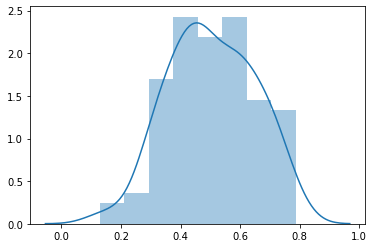

interactive(children=(FloatSlider(value=1.5, description='Epsilon', max=3.0, min=0.01, step=0.01), FloatSlider…

In [2]:

max_sample_size = 100

# generate a sample data vector
data_normal = np.random.normal(loc = .5, scale = .150, size = max_sample_size)

# DP mean requires numbers to be positive and within the range [0, 1]
#     data_ = abs(data)
data_normal = data_normal.clip(min = 0, max = 1.0)

sns.distplot(data_normal)

def show_mean(data,Epsilon=1.0, Delta = 0.1, Sample_size = 100):
    # This function will allow the outputs of the means to be interactive
    # This fucntion gives an example of using the dp_mean() function
    # The true sample mean and differentially private mean of the data vector will be displayed for comparison
    
    data = data[:Sample_size]
    
    # find the non-differentially private mean of the generated data
    mean_control = np.mean(data)
    
    # find the differentially private mean of the generated data
    # dp_mean( data_vect, epsilon=1.0, delta=0.1 )
    mean_dp = dps.dp_mean(data, epsilon = Epsilon, delta = Delta)
    
    # output the control and differentially private mean
    control_txt = 'Non-private Mean: {}'.format(round(mean_control, 4))
    display(control_txt)
    dp_txt = 'Differentially Private Mean: {}'.format(round(float(mean_dp), 4))
    display(dp_txt)
    
# this is the action for the sliders
show_mean_interact = lambda Epsilon, Delta, Sample_size: show_mean(data_normal,Epsilon, Delta, Sample_size )

# this actually creates the sliders
interact(show_mean_interact, Epsilon=(0.01,3,0.01), Delta=(0.01,0.5,0.01), Sample_size=(1,max_sample_size,5));

Each run of the cell generates a new dataset, changing the sample size uses a different amount of the same sample, changing other parameters re-privatizes the same dataset. The figure is of the whole dataset, not the subset

<!-- It can be noted from the outputs that the differentially private mean will roughly come closer to the actual sample mean when the sample size becomes larger with fixed privacy level, or the privacy level becomes small (Epsilon being large) with fixed sample size. -->

Let's verify that it does what we expect, by modifying the demo a little

In [19]:
def show_mean_eps_only(data,Epsilon=1.0,  Sample_size = 100):
    # This function will allow the outputs of the means to be interactive
    # This fucntion gives an example of using the dp_mean() function
    # The true sample mean and differentially private mean of the data vector will be displayed for comparison
    
    data = data[:Sample_size]
    
    # find the non-differentially private mean of the generated data
    mean_control = np.mean(data)
    
    # find the differentially private mean of the generated data
    # dp_mean( data_vect, epsilon=1.0, delta=0.1 )
    mean_dp = dps.dp_mean(data, epsilon = Epsilon, delta = 0)
    
    data_opt_out = data.copy()
    mean_dp_opt_out = dps.dp_mean(data[:-1], epsilon = Epsilon, delta = 0)
#     print(data_opt_out)
    
    # output the control and differentially private mean
    control_txt = 'Non-private Mean: {}'.format(round(mean_control, 4))
    display(control_txt)
    dp_txt = 'Differentially Private Mean: {}'.format(round(float(mean_dp), 4))
    display(dp_txt)
    dp_bound = 'Region for Leave one Out: {} - {}'.format(round(float(mean_control - 1/(Sample_size*Epsilon)), 4),
                                                       round(float(mean_control + 1/(Sample_size*Epsilon)), 4))
    display(dp_bound)
    dp_txt_opt = 'Differentially Private Mean Without 1: {}'.format(round(float(mean_dp_opt_out), 4))
    display(dp_txt_opt)
    
# this is the action for the sliders
show_mean_interact_eps = lambda Epsilon, Sample_size: show_mean_eps_only(data_normal,Epsilon,  Sample_size )

# this actually creates the sliders
interact(show_mean_interact_eps, Epsilon=(0.01,3,0.01),  Sample_size=(1,max_sample_size,5));

interactive(children=(FloatSlider(value=1.5, description='Epsilon', max=3.0, min=0.01, step=0.01), IntSlider(v…

### Understanding the parameters

**What parameters can you change to make the private compuation match the nonprivate compuation?**

Use the next cell(s) to set up an experiment that explores this question more formally.  

The goal is to create a table like the one below(but longer) so that it can be plotted with a FacetGrid that shows subplots for (epsilon, delta) pairs and for each plots the two estimates vs number of samples. 

|sample_size | epsilon  |  delta |  stat_type | stat    | 
|------------|----------|--------|------------|---------|
|10          |  0.1     | 0.1    |  true_mean | 0.462045| 
|10          |  0.1     | 0.1    |  dp_mean   | 1.585692| 
|10          |  0.1     | 0.2    |  true_mean | 0.462045| 
|10          |  0.1     | 0.2    |  dp_mean   | 1.627882| 
|10          |  0.1     | 0.3    |  true_mean | 0.462045| 

In [3]:
sample_size_list = [10, 50,400]
epsilon_list = [.1,.2,.5,1]
delta_list = [.1,.2,.3]
expt_result = []

for ss in sample_size_list:
    for epsilon in epsilon_list:
        for delta in delta_list: 
    
            data = data_normal[:ss]
            mean_control = np.mean(data)
            expt_result.append([ss,epsilon,delta,'true_mean',mean_control])

            mean_dp = dps.dp_mean(data, epsilon = epsilon, delta = delta)
            expt_result.append([ss,epsilon,delta,'dp_mean',mean_dp[0]])
    
expt_vars = ['sample_size','epsilon','delta','stat_type','stat']
mean_dp_exp_df = pd.DataFrame(data = expt_result, columns = expt_vars)
mean_dp_exp_df.head()

,sample_size,epsilon,delta,stat_type,stat
0,10,0.1,0.1,true_mean,0.483961
1,10,0.1,0.1,dp_mean,-0.486616
2,10,0.1,0.2,true_mean,0.483961
3,10,0.1,0.2,dp_mean,0.770661
4,10,0.1,0.3,true_mean,0.483961


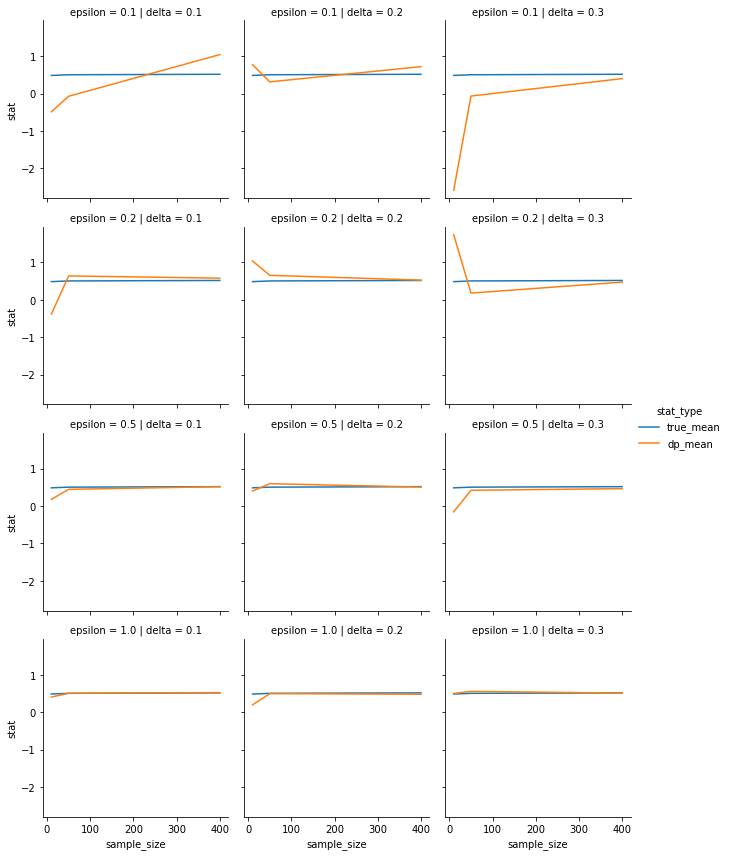

In [4]:
g = sns.FacetGrid(data = mean_dp_exp_df, row = 'epsilon',col='delta',hue='stat_type')
g = g.map(plt.plot,'sample_size','stat').add_legend()

Can you extend the experiment to run multiple random samples of the dataset for each sample size, average the results and plot the trial and mean results?

## Differentially Private Variance
---

The following tutorial gives one example of how the `dp_var()` funciton is called. The data samples are randomly drawn from a Gaussian distribution. The output of the `dp_var()` function will be compared to a non-differentially private version of the sample variance: $\sigma^2=\frac{1}{n}\sum_{i=1}^{n}(x_i-\bar{x})^2$, where $\bar{x}$ is the sample mean. 

The parameters that can be adjusted are:

- Epsilon
- Delta
- Sample_size

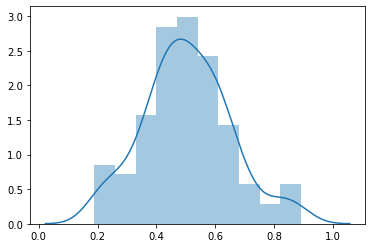

interactive(children=(FloatSlider(value=1.5, description='Epsilon', max=3.0, min=0.01, step=0.01), FloatSlider…

In [5]:

# generate a sample data vector
data_normal = np.random.normal(loc = .5, scale = .150, size = max_sample_size)

# DP mean requires numbers to be positive and within the range [0, 1]
#     data_ = abs(data)
data_normal = data_normal.clip(min = 0, max = 1.0)

sns.distplot(data_normal)

# This function will allow the output of the variances to be interactive
def show_variance(data,Epsilon=1.0, Delta = 0.1, Sample_size = 100):
    data = data[:Sample_size]
    

    # find the non-differentially private variance of the generated data
    mean_control = (np.sum(data) * 1.0) / (Sample_size * 1.0)
    var_control = np.var(data)

    
    # find the differentially private variance of the generated data
    # dp_var( data_vector,epsilon=1.0,delta=0.1 )
    var_dp = dps.dp_var(data, epsilon = Epsilon, delta = Delta,)
    
    # output the control and differentially private variance
    control_txt = "Non-private Variance: {}".format(round(var_control, 4))
    display(control_txt)
    dp_txt = "Differentially Private Variance: {}".format(round(float(var_dp), 4))
    display(dp_txt)
    
show_variance_interact = lambda Epsilon, Delta, Sample_size: show_variance(data_normal,Epsilon=1.0, Delta = 0.1, Sample_size = 100)


interact(show_variance_interact, Epsilon=(0.01,3.0,0.01), Delta=(0.01,0.5,0.01), Sample_size=(1,max_sample_size,5));

Each run of the cell generates a new dataset, changing the sample size uses a different amount of the same sample, changing other parameters re-privatizes the same dataset.

## Differentially Private Histogram
---

The following tutorial gives one example of how the `dp_hist()` function is called. The data samples are randomly drawn from a Gaussian distribution. The output of the `dp_hist()` function will be used to populate a bar graph and show the empirical distribution of the data. In addition, a non-private version of the histogram will be shown as a comparison.

The parameters that can be adjusted are:

- Epsilon
- Sample_size


In [6]:
# This function will allow the output graphs to be interactive
def plthist(Epsilon=1.0, Sample_size = 2500):
    # generate a sample data vector
    data_ = np.random.normal(loc = 0, scale = 1.0, size = Sample_size)

    # get the histogram count and bin edges from the differentially private histogram
    # dp_hist ( data, num_bins=10, epsilon=1.0, delta=0.1, histtype = 'continuous' )
    dp_hist_counts, bin_edges = dps.dp_hist(data = data_, num_bins = 10, epsilon = Epsilon, delta = 0.1)

    dp_hist_counts = dp_hist_counts.clip(min = 0)    # number of items in bin can't be negative
    bin_edges_ = bin_edges[:len(dp_hist_counts)]    # grab only the left edge for each bin

    # get the width for each of the bins
    width_ = []
    for i in range(len(bin_edges) - 1):
        app = bin_edges[i + 1] - bin_edges[i]
        width_.append(app)
        
    f, axs = plt.subplots(1,2,figsize=(15,5))
    # plot the non-differentially private version of the histogram
    axs[0].hist(data_, bins=10)
    axs[0].set_title('Non-differentially Private Histogram')
    axs[0].set_xlabel('Data Distribution')
    axs[0].set_ylabel('Frequency')
    axs[0].grid(True)
    
#     plt.subplot(1, 2, 2)
    # plot the differentially private version of the histogram
    axs[1].bar(bin_edges_, dp_hist_counts, width_)
    axs[1].set_title('Differentially Private Histogram')
    axs[1].set_xlabel('Data Distribution')
    axs[1].set_ylabel('Frequency')
    axs[1].grid(True)



interact(plthist, Epsilon=(0.1,3.0,0.1), Sample_size=(100,5000,10));

interactive(children=(FloatSlider(value=1.0, description='Epsilon', max=3.0, min=0.1), IntSlider(value=2500, d…

## Out of distribution

Do other data settings change how these statistics compute?

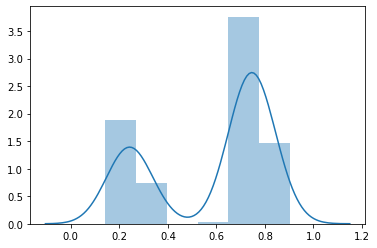

interactive(children=(FloatSlider(value=1.5, description='Epsilon', max=3.0, min=0.01, step=0.01), FloatSlider…

In [13]:
# generate a sample data vector
data_0 = np.random.normal(loc = .25, scale = .050, size = max_sample_size)
data_1 = np.random.normal(loc = .75, scale = .050, size = max_sample_size*2)

data_mix = np.concatenate([data_0,data_1])

# DP mean requires numbers to be positive and within the range [0, 1]
#     data_ = abs(data)
data_mix = data_mix.clip(min = 0, max = 1.0)

sns.distplot(data_mix)

   
# this is the action for the sliders
show_mean_interact = lambda Epsilon, Delta, Sample_size: show_mean(data_mix,Epsilon, Delta, Sample_size )

# this actually creates the sliders
interact(show_mean_interact, Epsilon=(0.01,3,0.01), Delta=(0.01,0.5,0.01), Sample_size=(1,max_sample_size*3,5));